#**Classification Task**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload=files.upload()

Saving lendingclub (1).csv to lendingclub (1).csv


In [ ]:
df=pd.read_csv('lendingclub (1).csv')

**Data Dictionary**
1.   id: A unique LC assigned ID for loan listing
2.   member_id: A unique LC assigned ID for borrower
3. loan_amnt: Listed amount of loan applied by the borrower
4. funded_amnt: Total amount committed to that loan at that point in time
5. installment: Monthly payment owed by the borrower
6. grade: LC assigned loan grade
7. sub_grade: LC assigned loan subgrade
8. emp_title: Job title
9. emp_length: Employment length in years
10. home_ownership: Home ownership status
11. annual_inc: Annual income of the borrower
12. purpose: Loan purpose
13. title: Loan title provided by the borrower
14. zipcode: Address zipcode of the borrower
15. addr_state: Address state of the borrower
16. dti: Debt-to-income ratio
17. delinq_2yrs: Number of 30+ days past due delinquency for past 2 years
18. earliest_cr_line: Date of borrower's earliest credit line reporting
19. inq_last_6mths: Number of inquiries past 6 months
20. mths_since_last_delinq: Number of months since borrower's last delinquency
21. mths_since_last_record: Number of months since borrower's last record
22. openAcc: Number of open credit lines
23. pubRec: Number of derogatory public records
24. revol_bal: Total credit revolving balance
25. revol_util: Revolving creditline utilization rate 
26. totalAcc: Number of credit lines currently
27. initial_list_status: Initial listing status of the loan ('w /'f')
28. collections_12_mths_ex_med:  Number of collections in 12 months excluding medical  
29.  mths_since_last_major_derog: Months since most recent 90-day or worst rating
30.  application_type: Individual or joint application          
31.  acc_now_delinq: Number of accounts on which borrower is now delinquent               
32.  tot_coll_amt: Total collection amount               
33.  tot_cur_bal:  Total current balance               
34.  loan_is_bad:  Target('True'/'False')   





#**Data Exploration & Preprocessing**

In [ ]:
df.info() #Exploring the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   15236 non-null  int64  
 1   id                           15236 non-null  int64  
 2   member_id                    15236 non-null  int64  
 3   loan_amnt                    15236 non-null  int64  
 4   funded_amnt                  15236 non-null  int64  
 5   installment                  15236 non-null  float64
 6   grade                        15236 non-null  object 
 7   sub_grade                    15236 non-null  object 
 8   emp_title                    14311 non-null  object 
 9   emp_length                   14647 non-null  float64
 10  home_ownership               15236 non-null  object 
 11  annual_inc                   15236 non-null  float64
 12  purpose                      15236 non-null  object 
 13  title           

In [ ]:
df.isnull().sum()#Checking for null values

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
installment                        0
grade                              0
sub_grade                          0
emp_title                        925
emp_length                       589
home_ownership                     0
annual_inc                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq          8520
mths_since_last_record         14459
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         9
total_acc                          0
i

In [ ]:
#Since, 'mths_since_last_record', 'mths_since_last_major_derog' and 'mths_since_last_delinq' have majority of the values missing, we will remove those columns from the dataset
df=df.drop(['mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog'],axis=1)

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
installment                      0
grade                            0
sub_grade                        0
emp_title                      925
emp_length                     589
home_ownership                   0
annual_inc                       0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       9
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med       0
application_type                 0
acc_now_delinq      

In [ ]:
#Also, we remove nominal variables like 'emp_title','id' and 'member_id'
df=df.drop(['emp_title','id','member_id'],axis=1)

In [ ]:
df[df['tot_coll_amt']>0].count()
#As we can see, the number of people with 'total collection amounts ever owed' greater than 0 are only 710 i.e. less than 5%, we will drop this column

Unnamed: 0                    710
loan_amnt                     710
funded_amnt                   710
installment                   710
grade                         710
sub_grade                     710
emp_length                    686
home_ownership                710
annual_inc                    710
purpose                       710
title                         710
zip_code                      710
addr_state                    710
dti                           710
delinq_2yrs                   710
earliest_cr_line              710
inq_last_6mths                710
open_acc                      710
pub_rec                       710
revol_bal                     710
revol_util                    710
total_acc                     710
initial_list_status           710
collections_12_mths_ex_med    710
application_type              710
acc_now_delinq                710
tot_coll_amt                  710
tot_cur_bal                   710
loan_is_bad                   710
dtype: int64

In [ ]:
df.drop('tot_coll_amt',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
loan_amnt                        0
funded_amnt                      0
installment                      0
grade                            0
sub_grade                        0
emp_length                     589
home_ownership                   0
annual_inc                       0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       9
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med       0
application_type                 0
acc_now_delinq                   0
tot_cur_bal                   4619
loan_is_bad                      0
dtype: int64

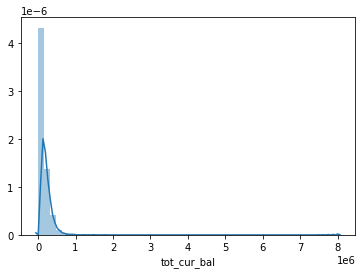

In [ ]:
import seaborn as sns
sns.distplot(df['tot_cur_bal'])

In [ ]:

#We will impute 'tot_cur_bal' with the median
df['tot_cur_bal'].replace(np.NaN,df['tot_cur_bal'].median(),inplace=True)

In [ ]:
#We'll just drop the remaining rows as they account for less than 5% of the whole data.
df.dropna(axis=0,how='any',subset=['emp_length','revol_util','title'],inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
loan_amnt                     0
funded_amnt                   0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_cur_bal                   0
loan_is_bad                   0
dtype: int64

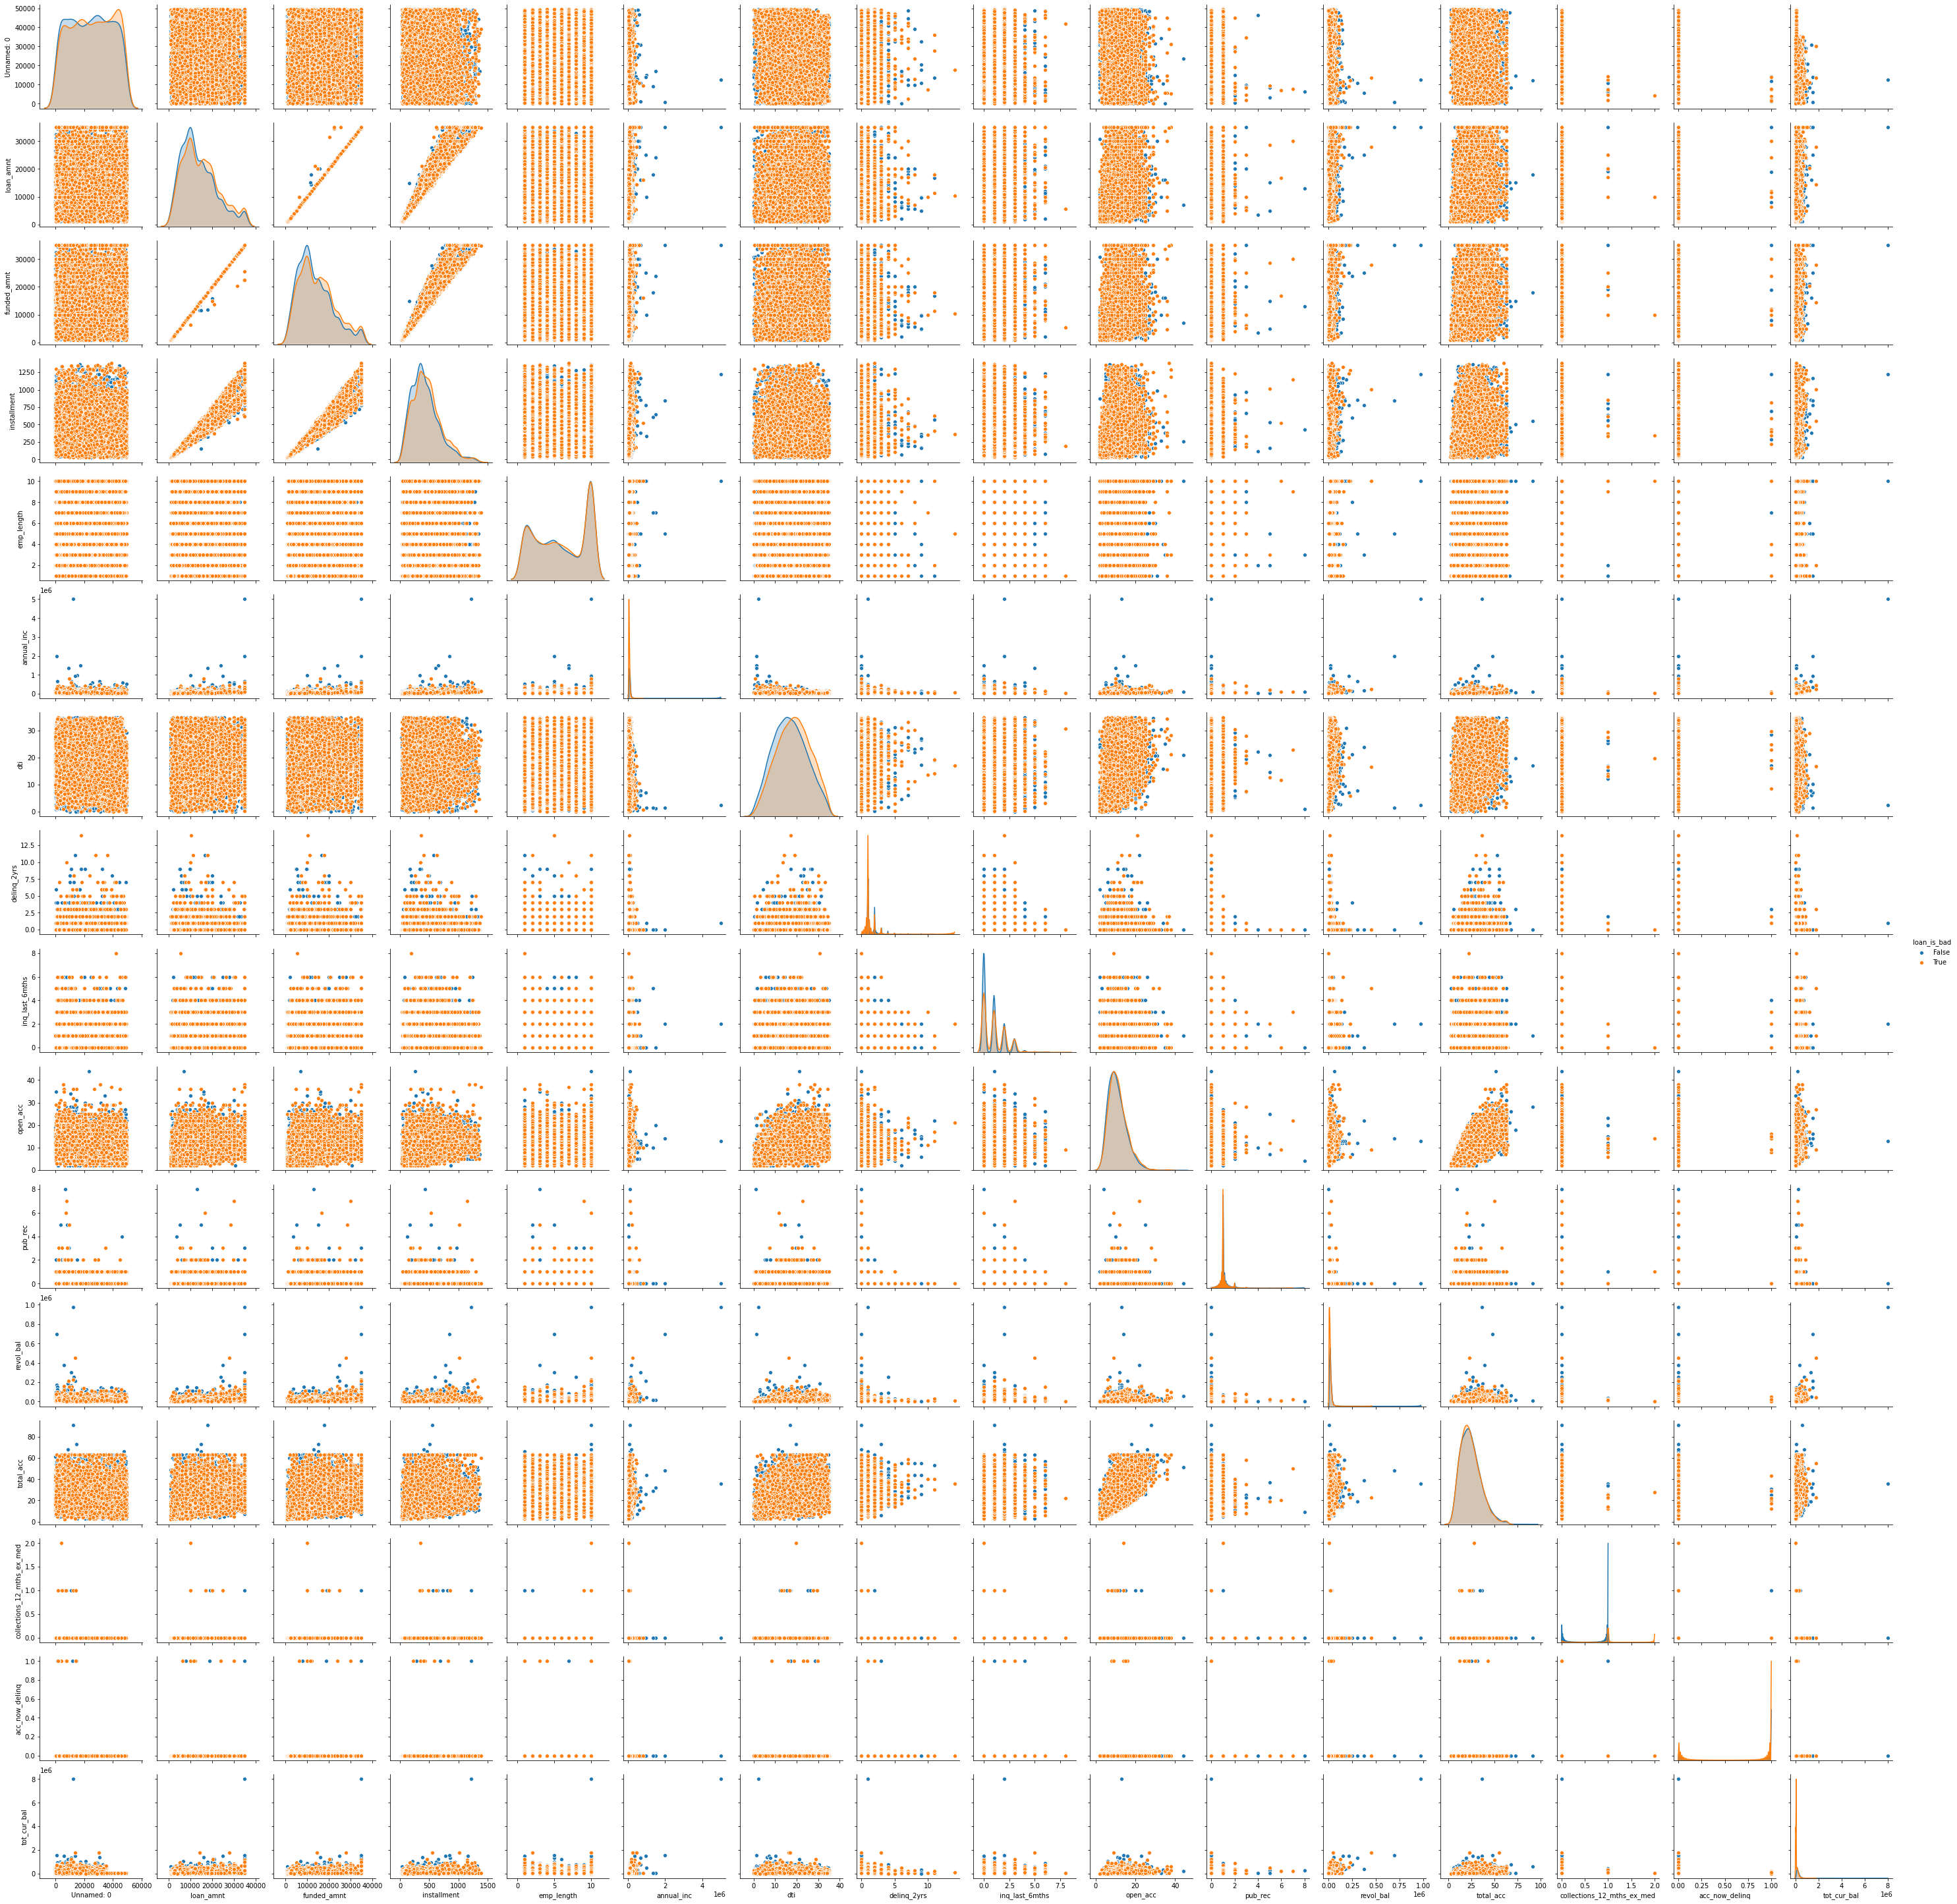

In [ ]:
sns.pairplot(df,hue='loan_is_bad')

In [ ]:
sum(df['loan_is_bad'])/len(df['loan_is_bad'])
#Thus, it is a balanced dataset

0.5050208347564724

In [ ]:
import matplotlib.pyplot as plt


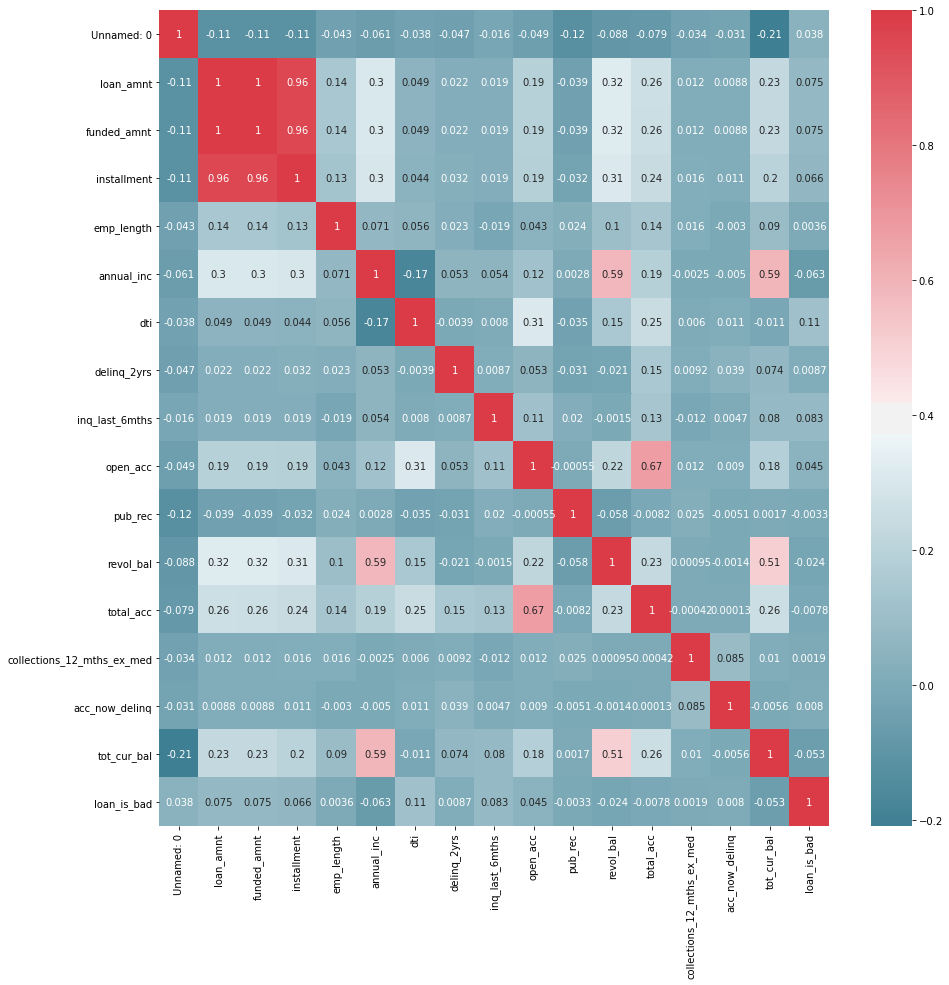

In [ ]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap=cmap,annot=True)

In [ ]:
#From the plot we can see that there's not much correlation between the features

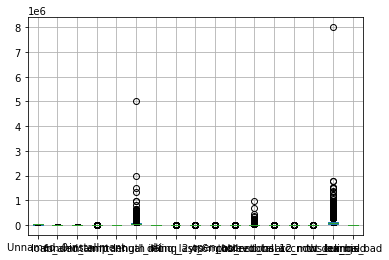

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,Unnamed: 0,loan_amnt,funded_amnt,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal
count,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,1.463900e+04,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,1.463900e+04
mean,25094.539108,14383.487602,14378.123506,449.495593,5.963454,6.922834e+04,17.804399,0.230002,0.911538,11.120363,0.056766,15886.774165,24.165927,0.000888,0.000615,1.088662e+05
std,14389.878195,8193.993841,8188.541266,246.412771,3.411696,6.263815e+04,7.760493,0.697652,1.046417,4.559694,0.275351,17780.761935,10.979505,0.031999,0.024788,1.375075e+05
min,1.000000,1000.000000,1000.000000,25.810000,1.000000,9.100000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00
25%,12637.000000,8000.000000,8000.000000,273.780000,3.000000,4.368000e+04,11.970000,0.000000,0.000000,8.000000,0.000000,7146.500000,16.000000,0.000000,0.000000,3.745500e+04
50%,25373.000000,12375.000000,12375.000000,411.740000,6.000000,6.000000e+04,17.720000,0.000000,1.000000,10.000000,0.000000,12373.000000,23.000000,0.000000,0.000000,6.544000e+04
75%,37689.000000,20000.000000,20000.000000,578.280000,10.000000,8.200000e+04,23.520000,0.000000,2.000000,14.000000,0.000000,20236.000000,31.000000,0.000000,0.000000,1.379565e+05
max,49498.000000,35000.000000,35000.000000,1380.630000,10.000000,5.000000e+06,34.970000,14.000000,8.000000,44.000000,8.000000,975800.000000,91.000000,2.000000,1.000000,8.000078e+06


In [ ]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [ ]:
df['grade'].unique()

array(['C', 'D', 'F', 'B', 'A', 'E', 'G'], dtype=object)

In [ ]:
df['grade']=df['grade'].map({'A':7,'B':6,'C':5, 'D':4, 'E':3,'F':2, 'G':1})

In [ ]:
df['purpose'].nunique()

13

In [ ]:
df['title'].nunique()

5384

In [ ]:

df['application_type'].nunique()

1

In [ ]:
df['collections_12_mths_ex_med'].unique()

array([0, 1, 2])

In [ ]:
df['pub_rec'].nunique()

9

In [ ]:
df['initial_list_status'].nunique()

2

In [ ]:
df['initial_list_status']=df['initial_list_status'].map({'w':1,'f':0})

In [ ]:
df.drop(['sub_grade','title','zip_code','earliest_cr_line','inq_last_6mths','application_type','pub_rec'],axis=1,inplace=True)

In [ ]:
df2=pd.get_dummies(df[['home_ownership','addr_state','purpose']])

In [ ]:
frames=[df,df2]
data=pd.concat(frames,axis=1)

In [ ]:
data.drop(['home_ownership','purpose','addr_state'],axis=1,inplace=True)

In [ ]:
data['revol_util']=data['revol_util'].str.replace('%','')

In [ ]:
data['revol_util']

0        50.30
1        66.10
2        83.20
3        25.10
4        47.80
         ...  
15231    25.10
15232    13.60
15233    55.50
15234    85.60
15235    61.30
Name: revol_util, Length: 14639, dtype: object

In [ ]:
data['revol_util']=data['revol_util'].astype(float)
data['revol_util']=data['revol_util']/100

In [ ]:
data.shape

(14639, 80)

In [ ]:
#Defining x and y variables
x=data.drop(['loan_is_bad'],axis=1)
y=data['loan_is_bad'].map({True:1,False:0})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Dividing the data into train and test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.21,random_state=0)

In [ ]:
#scaling the data
sc=MinMaxScaler()
x_sc = sc.fit_transform(x_train)
xt_sc=sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#**Applying Voting Classifiers**

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(x_sc, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(x_sc, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(x_sc, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(x_sc, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(x_sc, y_train)
    y_pred = clf.predict(xt_sc)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.6188617886178862
KNeighborsClassifier 0.5486178861788618
SVC 0.5866666666666667
VotingClassifier 0.5970731707317073


In [ ]:
log_clf = LogisticRegression()
log_clf.fit(x_sc, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(x_sc, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(x_sc, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(x_sc, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(x_sc, y_train)
    y_pred = clf.predict(xt_sc)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6188617886178862
KNeighborsClassifier 0.5486178861788618
SVC 0.5866666666666667
VotingClassifier 0.5902439024390244


#**Two Models with Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
lr_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6084552845528455


In [ ]:
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

Train score: 0.61
Test score: 0.61


In [ ]:
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(x_sc, y_train)
y_pred_tree = lr_clf.predict(xt_sc)

print(accuracy_score(y_test, y_pred_tree))

0.6188617886178862


In [ ]:
svc_clf = SVC(random_state=0)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import accuracy_score
print('Accuracy score" {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

Accuracy score" 0.59
Train score: 0.59
Test score: 0.59


#**Two models with Pasting**

In [ ]:
svc_clf = SVC(random_state=0)
bag_clf = BaggingClassifier(svc_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import accuracy_score
print('Accuracy score {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

Accuracy score 0.59
Train score: 0.59
Test score: 0.59


In [ ]:
lr_clf = LogisticRegression(random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(x_sc, y_train)
y_pred = bag_clf.predict(xt_sc)
from  sklearn.metrics import accuracy_score
print('Accuracy score {:.2f}'.format(accuracy_score(y_test, y_pred)))
bag_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(xt_sc, y_test)))

Accuracy score 0.61
Train score: 0.61
Test score: 0.61


#**Two models with AdaBoost Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(x_sc, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [ ]:
print('Train score: {:.2f}'.format(ada_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(xt_sc, y_test)))


Train score: 0.61
Test score: 0.61


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(x_sc, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(x_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(xt_sc, y_test)))


Train score: 0.64
Test score: 0.62


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(x_sc, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(xt_sc, y_test)))

Accuracy on training set: 0.656
Accuracy on test set: 0.618


#**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(x_sc, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(xt_sc, y_test)))

Accuracy on training set: 0.656
Accuracy on test set: 0.618


#**Deep Learning Model(Neural Network)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# create model
model = Sequential()
model.add(Dense(40, input_dim=79, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_sc, y_train, epochs=100, batch_size=16, validation_split=0.15)
# evaluate the model
scores = model.evaluate(xt_sc, y_test, verbose=2)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 9829 samples, validate on 1735 samples
Epoch 1/100
9829/9829 [==============================] - 1s 114us/step - loss: 0.6777 - accuracy: 0.5680 - val_loss: 0.6641 - val_accuracy: 0.6000
Epoch 2/100
9829/9829 [==============================] - 1s 97us/step - loss: 0.6598 - accuracy: 0.6048 - val_loss: 0.6589 - val_accuracy: 0.6138
Epoch 3/100
9829/9829 [==============================] - 1s 101us/step - loss: 0.6525 - accuracy: 0.6174 - val_loss: 0.6529 - val_accuracy: 0.6184
Epoch 4/100
9829/9829 [==============================] - 1s 95us/step - loss: 0.6492 - accuracy: 0.6225 - val_loss: 0.6508 - val_accuracy: 0.6207
Epoch 5/100
9829/9829 [==============================] - 1s 97us/step - loss: 0.6462 - accuracy: 0.6264 - val_loss: 0.6566 - val_accuracy: 0.6075
Epoch 6/100
9829/9829 [==============================] - 1s 100us/step - loss: 0.6431 - accuracy: 0.6315 - val_loss: 0.6565 - val_accuracy: 0.6242
Epoch 7/100
9829/9829 [==============================] - 1s 98us/step - l

In [ ]:
#Predict
y_predict = model.predict_classes(xt_sc)
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

#**Dimensionality Reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
pca=PCA(n_components=0.96)
x_reduced=pca.fit_transform(x_sc)
xt_reduced=pca.transform(xt_sc)
x_reduced.shape

(11564, 45)

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_reduced,y_train)
log.score(x_reduced,y_train)

0.6196817710134901

In [ ]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []
for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver='liblinear')
    log_l1.fit(x_reduced, y_train)
    log_l2.fit(x_reduced, y_train)
    train_score_l1.append(log_l1.score(x_reduced, y_train))
    train_score_l2.append(log_l2.score(x_reduced, y_train))
    test_score_l1.append(log_l1.score(xt_reduced, y_test))
    test_score_l2.append(log_l2.score(xt_reduced, y_test))

In [ ]:
print('Train_score_l1:',train_score_l1)
print('Test_score_l1:',test_score_l1)
print('Train_score_l2:',train_score_l2)
print('Test_score_l2:',test_score_l2)

Train_score_l1: [0.4922172258734002, 0.5864752680733311, 0.6166551366309235, 0.6199411968177101, 0.6191629194050502, 0.6189899688689035, 0.6189899688689035]
Test_score_l1: [0.5053658536585366, 0.576910569105691, 0.615609756097561, 0.6120325203252033, 0.6126829268292683, 0.6126829268292683, 0.6126829268292683]
Train_score_l2: [0.5956416464891041, 0.6152715323417502, 0.6198547215496368, 0.6196817710134901, 0.6189899688689035, 0.6189899688689035, 0.6189899688689035]
Test_score_l2: [0.5928455284552846, 0.6117073170731707, 0.6146341463414634, 0.6123577235772357, 0.6126829268292683, 0.6126829268292683, 0.6126829268292683]


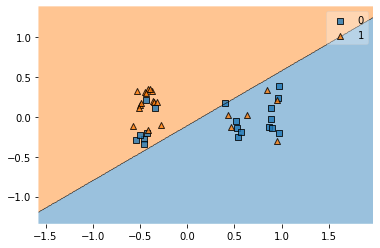

In [ ]:
#Decision boundary
from mlxtend.plotting import plot_decision_regions

X_b = x_reduced[10:50, [1,12]]
y_b = np.array(y_train[10:50])

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

In [ ]:
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression()
param = { 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}
logistic = GridSearchCV(logit,param,cv=5, return_train_score=True)
logistic.fit(x_reduced,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
logistic.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
logistic.best_score_

0.6137155045126313

In [ ]:
log=LogisticRegression(C=100, penalty='l2')
log.fit(x_reduced,y_train)
print(log.score(x_reduced,y_train))
print(log.score(xt_reduced,y_test))

0.6189899688689035
0.6123577235772357


In [ ]:
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(log,x_sc,y_train) )

Cross-validation scores: [0.5970601  0.62256809 0.62127108 0.62516213 0.62543253]


In [ ]:
pred_log=log.predict(xt_reduced)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_log, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.61      0.63      0.62      1554
         one       0.61      0.60      0.60      1521

    accuracy                           0.61      3075
   macro avg       0.61      0.61      0.61      3075
weighted avg       0.61      0.61      0.61      3075



#**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(max_depth=1).fit(x_reduced, y_train)
pred_tree= tree.predict(xt_reduced)
print("Test score: {:.3f}".format(tree.score(xt_reduced, y_test)))
print("Train score: {:.3f}".format(tree.score(x_reduced, y_train)))


Test score: 0.566
Train score: 0.568


In [ ]:
print(classification_report(y_test, pred_tree, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.56      0.66      0.61      1554
         one       0.57      0.47      0.52      1521

    accuracy                           0.57      3075
   macro avg       0.57      0.56      0.56      3075
weighted avg       0.57      0.57      0.56      3075



In [ ]:
tree = DecisionTreeClassifier()
param = { 'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dtree = GridSearchCV(tree,param,cv=5, return_train_score=True)
dtree.fit(x_reduced,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
      

In [ ]:
dtree.best_params_

{'max_depth': 7}

In [ ]:
dtree.best_score_

0.5764430621565786

In [ ]:
tree= DecisionTreeClassifier(max_depth=7).fit(x_reduced, y_train)
pred_tree=tree.predict(xt_reduced)
print(tree.score(x_reduced,y_train))
print(tree.score(xt_reduced,y_test))

0.6436354202698028
0.576910569105691


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,pred_tree)

0.5775564237102698

In [ ]:
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(tree,x_reduced,y_train) )

Cross-validation scores: [0.57241677 0.58322525 0.57803718 0.5849546  0.56185121]


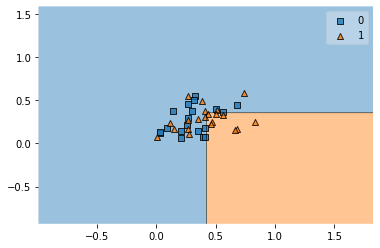

In [ ]:
#Decision boundary
from mlxtend.plotting import plot_decision_regions

X_b = x_sc[10:50,[1,12]]
y_b = np.array(y_train[10:50])

dtree= DecisionTreeClassifier(max_depth=2)
dtree.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = dtree)

#**Dummy Classifier**

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(x_reduced, y_train)

pred_most_frequent = dummy_majority.predict(xt_reduced)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Train score: {:.3f}".format(dummy_majority.score(x_reduced, y_train)))
print("Test score: {:.3f}".format(dummy_majority.score(xt_reduced, y_test)))

Unique predicted labels: [1]
Train score: 0.508
Test score: 0.495


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["zero", "one"]))


              precision    recall  f1-score   support

        zero       0.00      0.00      0.00      1554
         one       0.49      1.00      0.66      1521

    accuracy                           0.49      3075
   macro avg       0.25      0.50      0.33      3075
weighted avg       0.24      0.49      0.33      3075



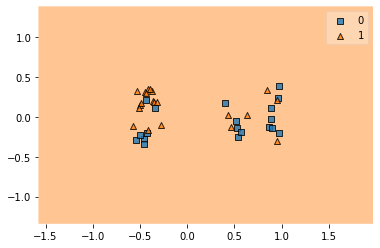

In [ ]:
#Decision boundary
from mlxtend.plotting import plot_decision_regions

X_b = x_reduced[10:50,[1,12]]
y_b = np.array(y_train[10:50])

dummy= DummyClassifier(strategy='most_frequent')
dummy.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = dummy)

#**LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
svc=LinearSVC(C=10)
svc.fit(x_reduced,y_train)
pred_linearsvc=svc.predict(xt_reduced)
print(svc.score(x_reduced,y_train))
print(svc.score(xt_reduced,y_test))

0.6181252161881702
0.6126829268292683


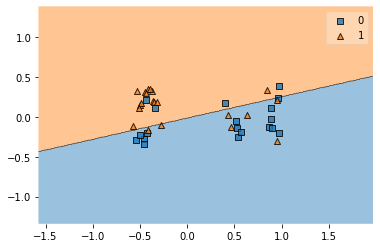

In [ ]:
#Decision boundary
X_b = x_reduced[10:50,[1,12]]
y_b = np.array(y_train[10:50])

clf= LinearSVC(C=10)
clf.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = clf)

In [ ]:
linsvc = LinearSVC()
param = { 'C':[0.001,0.01,0.1,1,10,100,100]}
linear_svc= GridSearchCV(linsvc,param,cv=5, return_train_score=True)
linear_svc.fit(x_reduced,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
linear_svc.best_params_

{'C': 0.01}

In [ ]:
linear_svc.best_score_

0.6135425689311355

In [ ]:
svc=LinearSVC(C=0.1)
svc.fit(x_reduced,y_train)
print(svc.score(x_reduced,y_train))
print(svc.score(xt_reduced,y_test))

0.6188170183327568
0.6120325203252033


In [ ]:
print('Cross-validation scores:',cross_val_score(svc,x_reduced,y_train) )

Cross-validation scores: [0.59878945 0.61003026 0.62429745 0.61521833 0.61807958]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linearsvc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.61      0.63      0.62      1554
         one       0.61      0.59      0.60      1521

    accuracy                           0.61      3075
   macro avg       0.61      0.61      0.61      3075
weighted avg       0.61      0.61      0.61      3075



#**SVC with kernels**

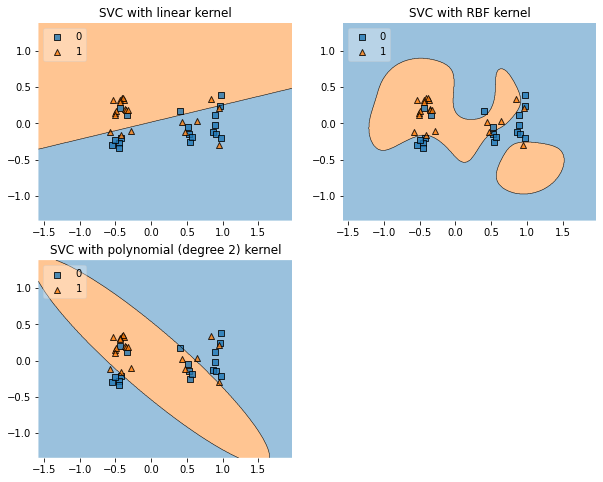

In [ ]:
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions 
import itertools
C = 10
X_b = x_reduced[10:50,[1,12]]
y_b = np.array(y_train[10:50])

clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=10, C=C)
clf4 = SVC(kernel='poly', degree=2, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = [
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 2) kernel']

for clf, lab, grd in zip([ clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,
                                clf=clf, legend=2)
    plt.title(lab)

In [ ]:
svc_kernel=SVC()
param = { 'kernel':['linear','rbf','poly']}
svc= GridSearchCV(svc_kernel,param,cv=5, return_train_score=True)
svc.fit(x_reduced,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
svc.best_params_

{'kernel': 'linear'}

In [ ]:
svc.best_score_

0.6135428307280797

In [ ]:
svc_lin=SVC(kernel='linear')
param = { 'C':[0.01,0.1,1,10,100]}
svc= GridSearchCV(svc_lin,param,cv=5, return_train_score=True)
svc.fit(x_sc,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

#**SVC with RBF kernels**

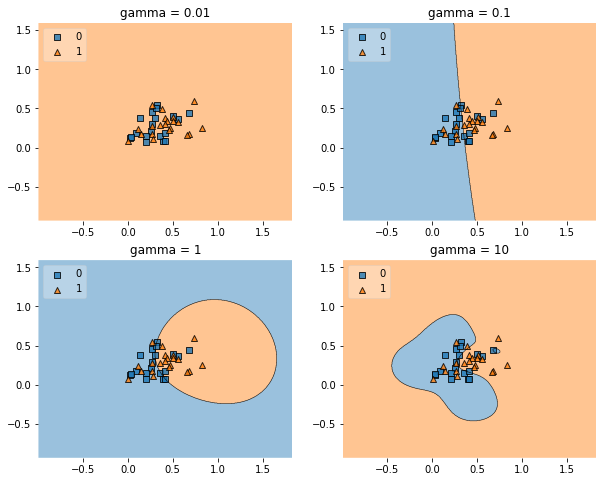

In [ ]:
from matplotlib import gridspec
import itertools
C = 10
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)

X_b = x_sc[10:50,[1,12]]
y_b = np.array(y_train[10:50])

models = (SVC(kernel='rbf', gamma=0.01, C=10),
         SVC(kernel = 'rbf', gamma = 0.1, C = 10),
         SVC(kernel = 'rbf', gamma = 1, C = 10),
         SVC(kernel = 'rbf', gamma = 10, C = 10))


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,
                                clf=clf, legend=2)
    plt.title(lab)

In [ ]:
svc=SVC(kernel='rbf',gamma=0.1)
svc.fit(x_reduced,y_train)
print(svc.score(x_reduced,y_train))
pred_rbf_svc=svc.predict(xt_reduced)
print(svc.score(xt_reduced,y_test))

0.6413005880318229
0.6188617886178862


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rbf_svc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.63      0.61      0.62      1554
         one       0.61      0.62      0.62      1521

    accuracy                           0.62      3075
   macro avg       0.62      0.62      0.62      3075
weighted avg       0.62      0.62      0.62      3075



#**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_reduced, y_train)
    train_score_array.append(knn.score(x_reduced, y_train))
    test_score_array.append(knn.score(xt_reduced, y_test))

In [ ]:
knn = KNeighborsClassifier(15)
knn.fit(x_reduced, y_train)
print(knn.score(x_reduced, y_train))
print(knn.score(xt_reduced, y_test))
pred_knn=knn.predict(xt_reduced)

0.6401764095468696
0.5626016260162602


In [ ]:
knn=KNeighborsClassifier()
param = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knnc= GridSearchCV(knn,param,cv=5, return_train_score=True)
knnc.fit(x_reduced,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
knnc.best_params_

{'n_neighbors': 15}

In [ ]:
knnc.best_score_

0.5507589119419798

In [ ]:
print('Cross-validation scores:',cross_val_score(knn,x_reduced,y_train) )

Cross-validation scores: [0.55425854 0.54517942 0.54517942 0.55642023 0.53027682]


In [ ]:
roc_auc_score(y_test,pred_knn)

0.5626454857224088

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.57      0.56      0.56      1554
         one       0.56      0.57      0.56      1521

    accuracy                           0.56      3075
   macro avg       0.56      0.56      0.56      3075
weighted avg       0.56      0.56      0.56      3075



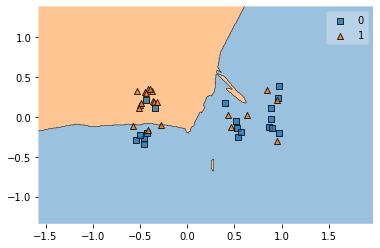

In [ ]:
#Decision boundary
from mlxtend.plotting import plot_decision_regions

X_b = x_reduced[10:50,[1,12]]
y_b = np.array(y_train[10:50])

knn = KNeighborsClassifier(9)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)

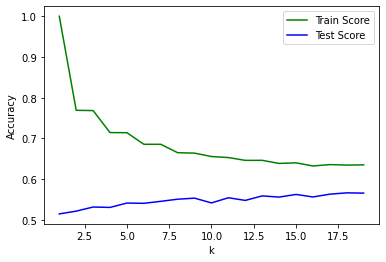

In [ ]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

#**Confusion matrix**

In [ ]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nLinear SVC:")
print(confusion_matrix(y_test, pred_linearsvc))
print("\nKNN:")
print(confusion_matrix(y_test, pred_knn))
print("\nSVC rbf:")
print(confusion_matrix(y_test, pred_rbf_svc))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_log))

#**Summary Table**

In [ ]:
Summary={'Algorithm':['Logistic Regression', 'KNN Classifier','Linear SVC', 'SVC with Kernel', 'Decision Tree','Dummy Classifier'], 'Best Accuracy Obtained':[[0.619,0.612],[0.640,0.562],[0.618,0.612],[0.648,0.618],[0.643,0.577],[0.508,0.495]], 'Parameters':[['C=100','penalty=l2'],'K=15','C=10',['kernel:rbf','gamma=0.1','C=1'],'max_depth=7','most_frequent']}
Summary_table_PostPCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [ ]:
Summary_table_PostPCA

,Algorithm,Best Accuracy Obtained,Parameters
0,Logistic Regression,"[0.619, 0.612]","[C=100, penalty=l2]"
1,KNN Classifier,"[0.64, 0.562]",K=15
2,Linear SVC,"[0.618, 0.612]",C=10
3,SVC with Kernel,"[0.648, 0.618]","[kernel:rbf, gamma=0.1, C=1]"
4,Decision Tree,"[0.643, 0.577]",max_depth=7
5,Dummy Classifier,"[0.508, 0.495]",most_frequent


In [ ]:
Summary={'Algorithm':['Logistic Regression', 'KNN Classifier','Linear SVC', 'SVC with Kernel', 'Decision Tree','Dummy Classifier'], 'Best Accuracy Obtained':[[0.626,0.620],[0.665,0.556],[0.627,0.619],[0.645,0.619],[0.610,0.607],[0.507,0.499]], 'Parameters':[['C=100','penalty=l2'],'K=15','C=10',['kernel:rbf','gamma=0.1','C=1'],'max_depth=1','most_frequent']}
Summary_table_prePCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [ ]:
Summary_table_prePCA

,Algorithm,Best Accuracy Obtained,Parameters
0,Logistic Regression,"[0.626, 0.62]","[C=100, penalty=l2]"
1,KNN Classifier,"[0.665, 0.556]",K=15
2,Linear SVC,"[0.627, 0.619]",C=10
3,SVC with Kernel,"[0.645, 0.619]","[kernel:rbf, gamma=0.1, C=1]"
4,Decision Tree,"[0.61, 0.607]",max_depth=1
5,Dummy Classifier,"[0.507, 0.499]",most_frequent


**As we can see from the summary tables, there is not much difference in the accuracy after applying PCA. Also, almost all the models have the same accuracy and precision and recall scores. However, Logistic Regression and Linear SVC can be considered as the models with the highest accuracy and precision.**